![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

Initial Data Preview:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE


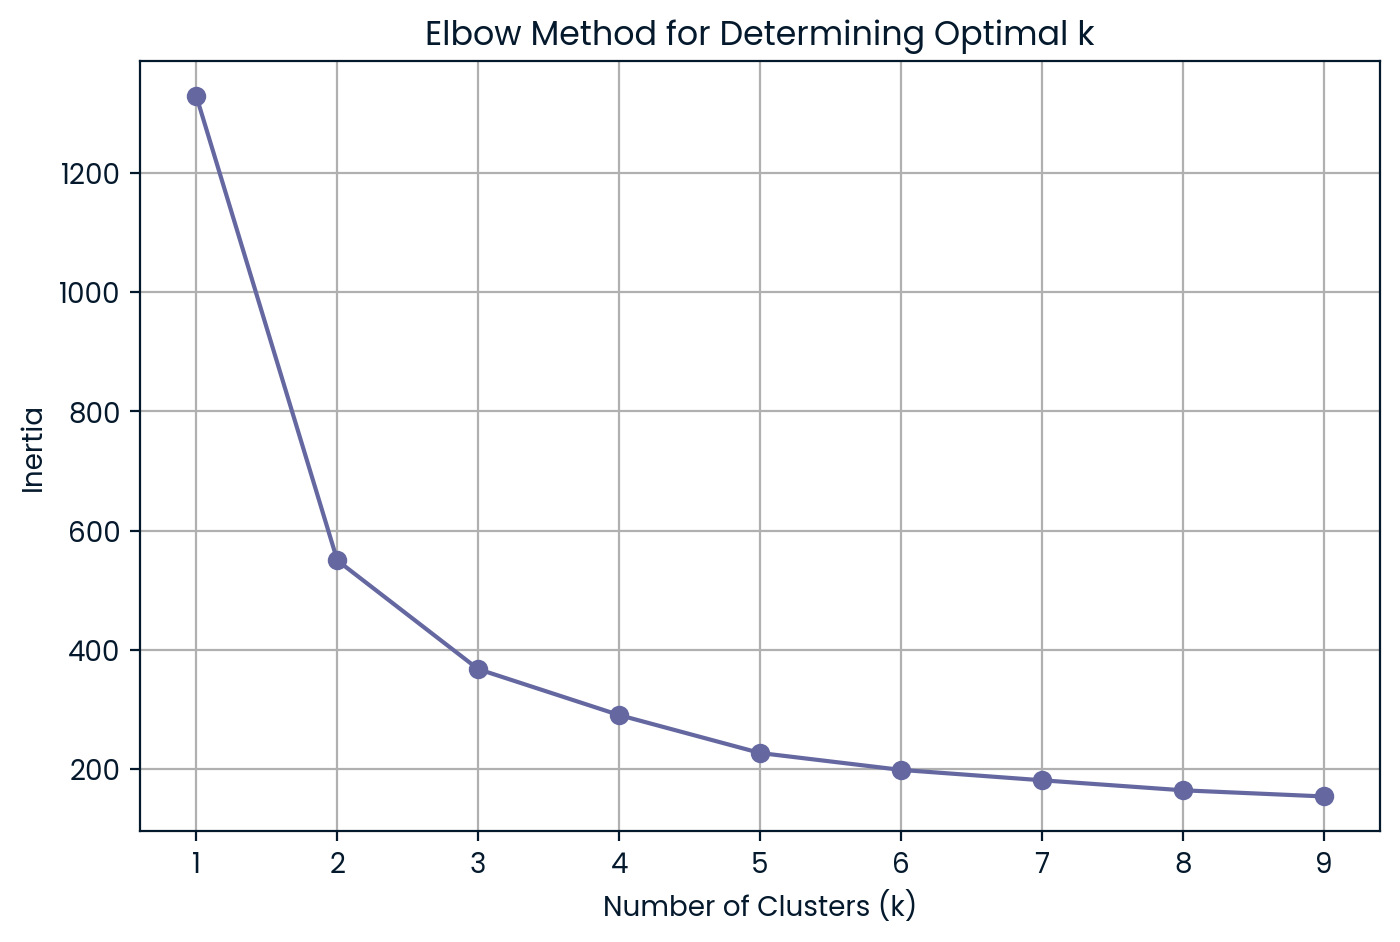


Cluster-wise Mean Statistics (stat_penguins):
   cluster  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0        0         47.662353        18.748235         196.917647  3898.235294
1        1         47.568067        14.996639         217.235294  5092.436975
2        2         38.305469        18.098437         188.554688  3587.500000


In [2]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
penguins_df = pd.read_csv("penguins.csv")

# Display the first few rows
print("Initial Data Preview:")
print(penguins_df.head())

# Preprocessing: Keep only numeric columns
penguins_numeric = penguins_df.select_dtypes(include=["number"])

# Handle missing values (drop rows with NaNs)
penguins_numeric = penguins_numeric.dropna()

# Standardize the data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_numeric)

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(penguins_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Determining Optimal k")
plt.grid(True)
plt.show()

# Perform clustering (choosing k=3 based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(penguins_scaled)

# Add cluster labels to the original numeric data
penguins_numeric["cluster"] = clusters

# Calculate mean values for each cluster
stat_penguins = penguins_numeric.groupby("cluster").mean().reset_index()

# Show the resulting DataFrame
print("\nCluster-wise Mean Statistics (stat_penguins):")
print(stat_penguins)
